# Adding north arrow, scale bar, and legend

In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import ee
import geemap
from geemap import cartoee
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
Map = geemap.Map()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [4]:
# get a landsat image to visualize
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_044034_20140318')

# define the visualization parameters to view
vis ={"bands": ['B5', 'B4', 'B3'], "min": 0, "max":5000, "gamma":1.3}

## Plot an RGB image

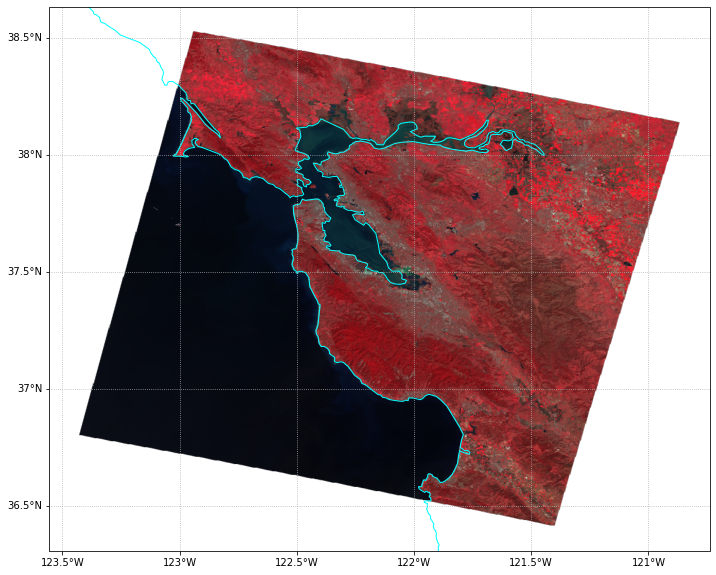

In [5]:
fig = plt.figure(figsize=(15, 10))

# use cartoee to get a map
ax = cartoee.get_map(image, vis_params=vis)

# pad the view for some visual appeal
cartoee.pad_view(ax)

# add the gridlines and specify that the xtick labels be rotated 45 degrees
cartoee.add_gridlines(ax,interval=0.5,xtick_rotation=0,linestyle=":")

# add the coastline
ax.coastlines(color="cyan")

## Adding north arrow, scale bar, and legend

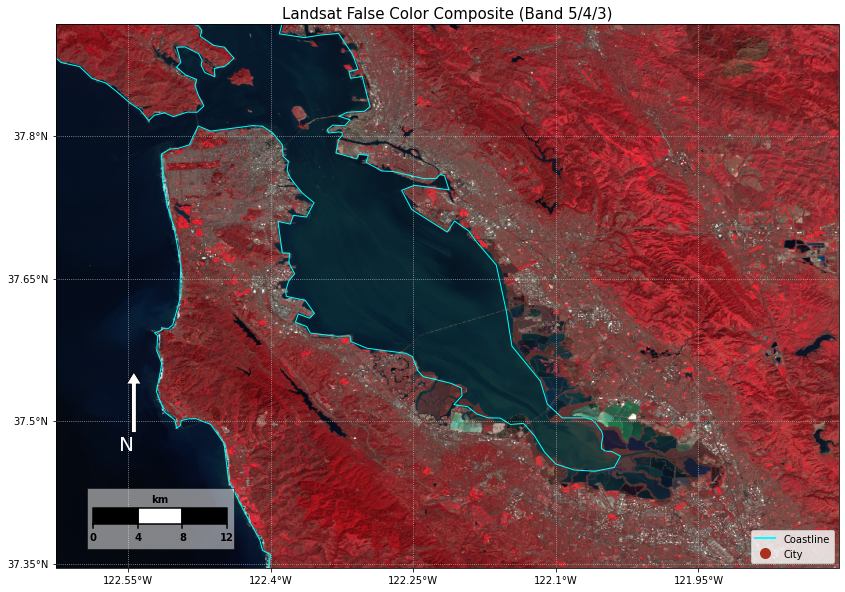

In [12]:
ig = plt.figure(figsize=(15, 10))

# here is the bounding box of the map extent we want to use;formatted a [W,S,E,N]
zoom_region = [-122.6265, 37.3458, -121.8025, 37.9178]

ax = cartoee.get_map(image, vis_params=vis, region=zoom_region)
cartoee.add_gridlines(ax, interval=0.15, xtick_rotation=0, linestyle=":")
ax.coastlines(color="cyan")

# add north arrow、scale bar、legend
north_arrow_dict = {
    "text": "N",
    "xy": (0.10, 0.36),
    "arrow_length": 0.15,
    "text_color": "white",
    "arrow_color": "white",
    "fontsize": 20,
    "width": 5,
    "headwidth": 15,
    "ha": "center",
    "va": "center"
}
cartoee.add_north_arrow(ax, **north_arrow_dict)
scale_bar_dict = {
    'metric_distance': 4,
    'unit': "km",
    'at_x':(0.05, 0.05),
    'at_y':(0.08, 0.11),
    'max_stripes': 3,
    'ytick_label_margins': 0.25,
    'fontsize': 10,
    'font_weight': "bold",
    'rotation': 0,
    'zorder': 999,
    'paddings': {"xmin": 0.05, "xmax":0.05, "ymin": 1.5, "ymax": 0.5},
}
cartoee.add_scale_bar(ax, **scale_bar_dict)
ax.set_title(label = 'Landsat False Color Composite (Band 5/4/3)', fontsize=15)
legend_elements = [Line2D([], [], color='#00ffff', lw=2, label='Coastline'),
    Line2D([], [], color='#A8321D', label='City',marker='o',markerfacecolor='#A8321D', markersize=10, ls ='')]

cartoee.add_legend(ax, legend_elements, loc='lower right')
show()